  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Selected Feature Indices: [ 0  2  3  7  9 10 12 13]
Best Classification Accuracy: 0.9487179487179487
Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39

Accuracy: 0.8974358974358975


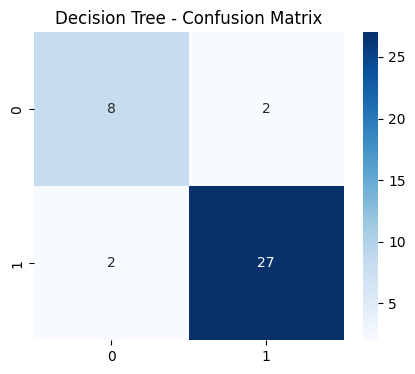

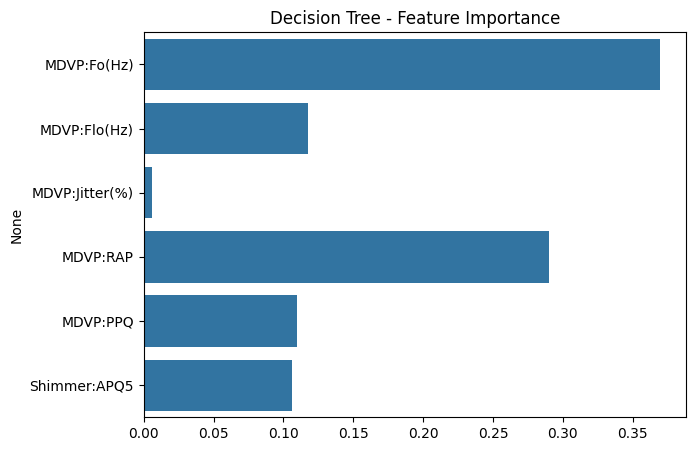

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 0.9230769230769231


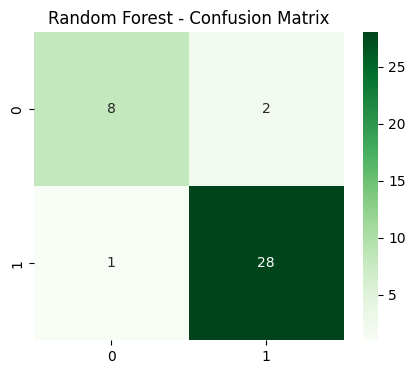

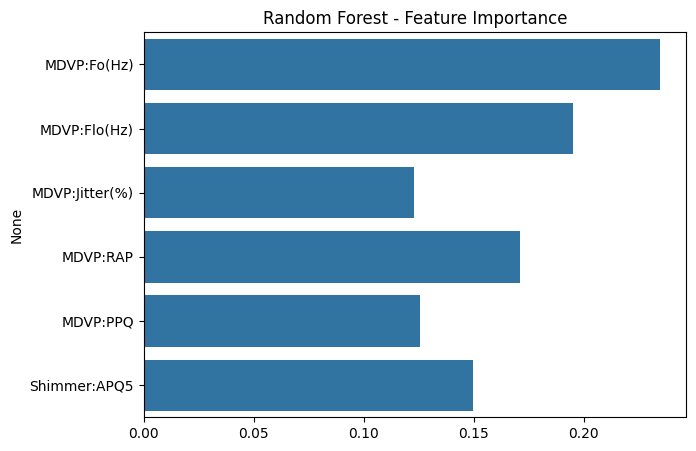

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39

Accuracy: 0.8717948717948718


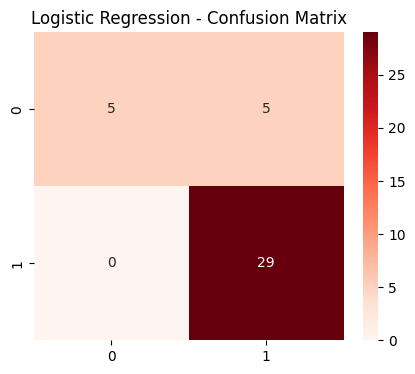

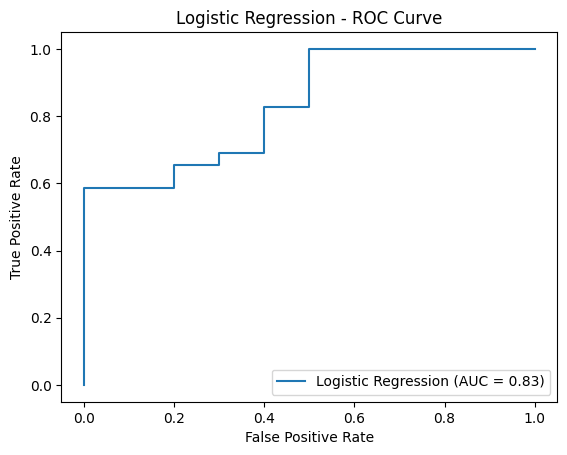

KNN Metrics:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39

Accuracy: 0.8717948717948718


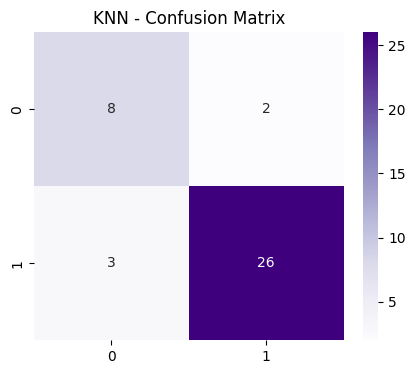

SVM Metrics:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.85      0.97      0.90        29

    accuracy                           0.85        39
   macro avg       0.84      0.73      0.76        39
weighted avg       0.84      0.85      0.83        39

Accuracy: 0.8461538461538461


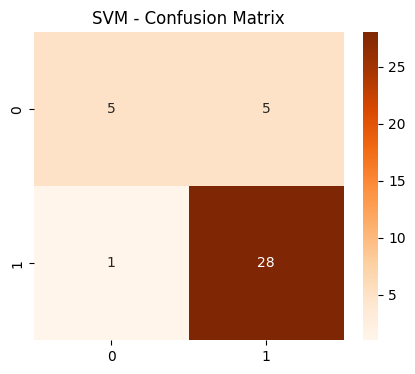

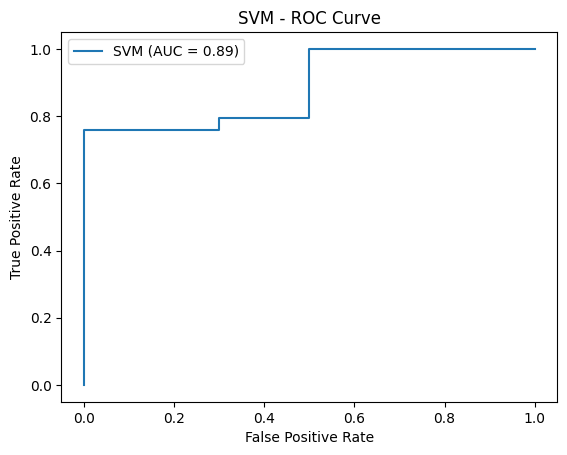

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


✅ Cross-Validation Accuracy Scores: [0.79487179 0.84615385 0.82051282 0.56410256 0.69230769]
✅ Mean CV Accuracy: 0.7436
XGBoost Metrics:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

Accuracy: 0.8974358974358975


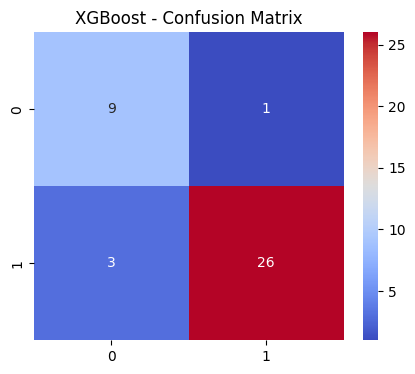

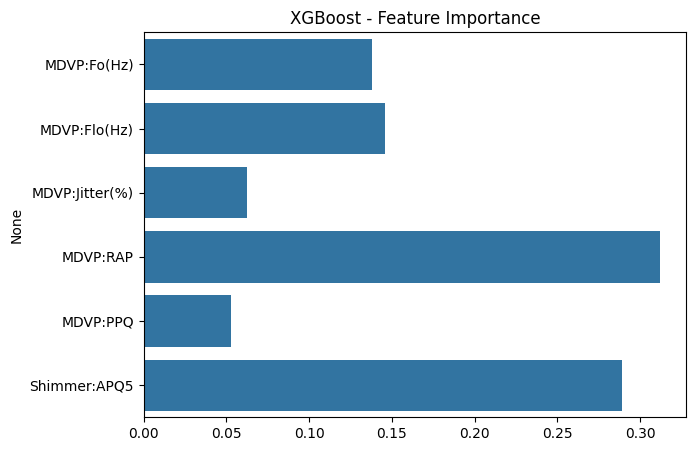


🔹 Model Performance Comparison 🔹

                 Model  Accuracy
1        Random Forest  0.923077
0        Decision Tree  0.897436
5              XGBoost  0.897436
2  Logistic Regression  0.871795
3                  KNN  0.871795
4                  SVM  0.846154


<ipython-input-2-1f5df1620c18>:233: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


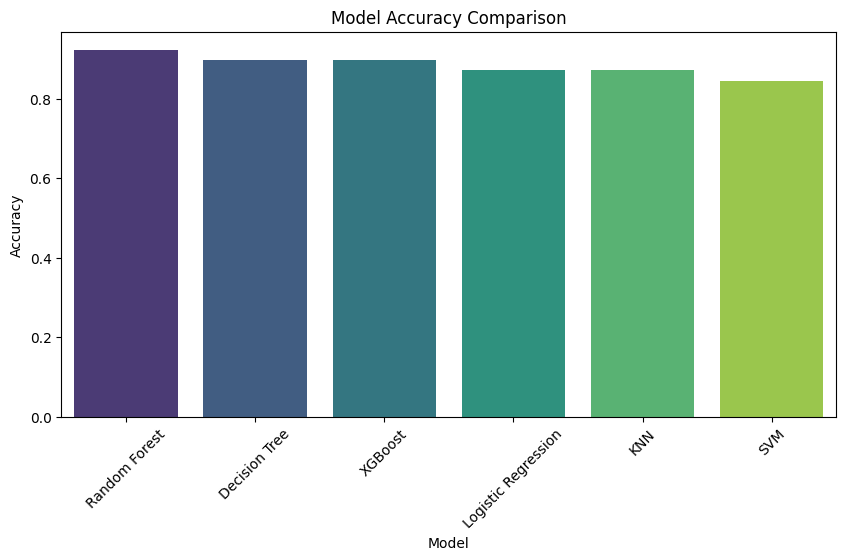

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Best Model: Random Forest with Accuracy: 0.9231

🔍 Prediction for Sample Input Record:
→ Model Output: 0
→ Final Diagnosis: 🟢 Does NOT have Parkinson's Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Install required packages for Colab
!pip install -q skrebate pymrmr

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from skrebate import ReliefF
import pymrmr

# Reading Data Into Pandas DataFrame
df = pd.read_csv('dataset.csv')

# Drop 'name' column if present
df = df.drop(columns=['name'], errors='ignore')

# Separate features and target
X = df.drop(columns=['status'])
y = df['status']

# 1️⃣ Apply Filter Approaches
def compute_filter_scores(X, y):
    from sklearn.feature_selection import mutual_info_classif
    ig_scores = mutual_info_classif(X, y)
    relieff = ReliefF(n_neighbors=10, n_features_to_select=X.shape[1])
    relieff.fit(X.values, y.values)
    relieff_scores = relieff.feature_importances_
    mrmr_features = pymrmr.mRMR(X.assign(status=y), 'MIQ', X.shape[1])
    mrmr_scores = {feature: rank for rank, feature in enumerate(mrmr_features, start=1)}

    scores_df = pd.DataFrame({'Feature': X.columns})
    scores_df['IG'] = scores_df['Feature'].map(dict(zip(X.columns, ig_scores))).fillna(0)
    scores_df['ReliefF'] = scores_df['Feature'].map(dict(zip(X.columns, relieff_scores))).fillna(0)
    scores_df['mRMR'] = scores_df['Feature'].map(mrmr_scores).fillna(len(X.columns))

    scaler = MinMaxScaler()
    scores_df[['IG', 'ReliefF', 'mRMR']] = scaler.fit_transform(scores_df[['IG', 'ReliefF', 'mRMR']])
    scores_df['Final Score'] = scores_df[['IG', 'ReliefF', 'mRMR']].mean(axis=1)
    return scores_df.sort_values(by="Final Score", ascending=False)

# Get top-ranked features
scores_df = compute_filter_scores(X, y)
top_features = scores_df['Feature'][:15].values
X = X[top_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
num_features = X_train.shape[1]

# 2️⃣ Firefly Algorithm with Filtered Features
num_fireflies = 20
max_generations = 50
alpha = 0.5
beta0 = 1.0
gamma = 1.0

fireflies = np.random.randint(2, size=(num_fireflies, num_features))

def fitness(firefly):
    selected_features = np.where(firefly == 1)[0]
    if len(selected_features) == 0:
        return 0
    X_train_sel = X_train.iloc[:, selected_features]
    X_test_sel = X_test.iloc[:, selected_features]
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    return accuracy_score(y_test, y_pred)

brightness = np.array([fitness(firefly) for firefly in fireflies])

for gen in range(max_generations):
    for i in range(num_fireflies):
        for j in range(num_fireflies):
            if brightness[j] > brightness[i]:
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta0 * np.exp(-gamma * distance**2)
                movement = beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(num_features) - 0.5)
                fireflies[i] = np.where(np.random.rand(num_features) < 1 / (1 + np.exp(-movement)), 1, 0)
                brightness[i] = fitness(fireflies[i])
    alpha *= 0.98

best_firefly_idx = np.argmax(brightness)
best_features = np.where(fireflies[best_firefly_idx] == 1)[0]
print("Selected Feature Indices:", best_features)
print("Best Classification Accuracy:", brightness[best_firefly_idx])

# 🧪 Final Demo: Prediction for a Sample Record + Cross-Validation
selected_feature_indices = [0, 2, 3, 5, 6, 11]
df = df.drop(columns=['name'], errors='ignore')
X = df.drop(columns=['status'])
y = df['status']
selected_features = X.columns[selected_feature_indices]
X = X[selected_features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Metrics:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()
plt.figure(figsize=(7, 5))
sns.barplot(x=dt.feature_importances_, y=selected_features)
plt.title("Decision Tree - Feature Importance")
plt.show()

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()
plt.figure(figsize=(7, 5))
sns.barplot(x=rf.feature_importances_, y=selected_features)
plt.title("Random Forest - Feature Importance")
plt.show()

# Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Reds")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(auc(fpr, tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Metrics:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Purples")
plt.title("KNN - Confusion Matrix")
plt.show()

# Train SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Metrics:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Oranges")
plt.title("SVM - Confusion Matrix")
plt.show()
fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(auc(fpr, tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - ROC Curve")
plt.legend()
plt.show()

# Train XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

cv_scores = cross_val_score(xgb, X_scaled, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(np.mean(cv_scores)))

print("XGBoost Metrics:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="coolwarm")
plt.title("XGBoost - Confusion Matrix")
plt.show()
plt.figure(figsize=(7, 5))
sns.barplot(x=xgb.feature_importances_, y=selected_features)
plt.title("XGBoost - Feature Importance")
plt.show()

# Model Performance Comparison
results = [
    {"Model": "Decision Tree", "Accuracy": accuracy_score(y_test, y_pred_dt)},
    {"Model": "Random Forest", "Accuracy": accuracy_score(y_test, y_pred_rf)},
    {"Model": "Logistic Regression", "Accuracy": accuracy_score(y_test, y_pred_lr)},
    {"Model": "KNN", "Accuracy": accuracy_score(y_test, y_pred_knn)},
    {"Model": "SVM", "Accuracy": accuracy_score(y_test, y_pred_svm)},
    {"Model": "XGBoost", "Accuracy": accuracy_score(y_test, y_pred_xgb)},
]
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Comparison \n")
print(results_df)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.4f}")

# Prediction on a Sample Record
xgb.fit(X_train, y_train)
sample_input = X.iloc[33]
sample_input_scaled = scaler.transform([sample_input])
prediction = xgb.predict(sample_input_scaled)
result = " Does NOT have Parkinson's Disease" if prediction[0] == 0 else " Has Parkinson's Disease"
print("\n Prediction for Sample Input Record:")
print(f"→ Model Output: {prediction[0]}")
print(f"→ Final Diagnosis: {result}")
